In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


Data Cleaning and Preprocessing:



In [2]:
#Load the dataset:
data = pd.read_csv('FlipkartProductReviews.csv')


In [3]:
#Remove unnecessary columns:
data = data[['Review', 'Sentiment']]


In [4]:
#Clean the text data:
data['Review'] = data['Review'].apply(lambda x: re.sub(r'[^\w\s]', '', str(x).lower()))


In [5]:
#Remove stopwords:
stop = stopwords.words('english')
data['Review'] = data['Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


Data Visualization and Analysis:



In [6]:
import matplotlib.pyplot as plt
import seaborn as sns


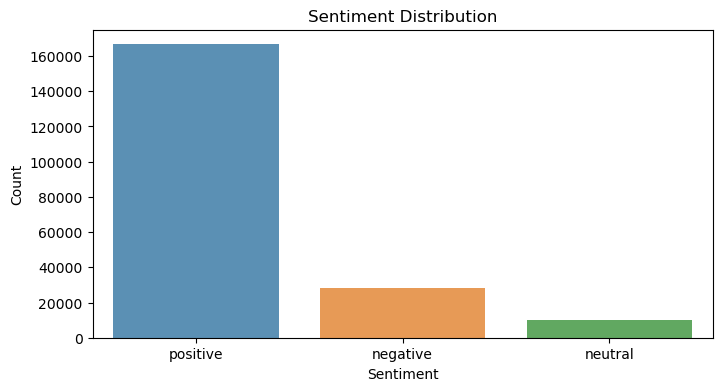

In [7]:
#Perform exploratory data analysis (EDA):


sentiment_counts = data['Sentiment'].value_counts()
plt.figure(figsize=(8, 4))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, alpha=0.8)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


Feature Extraction:



In [8]:
#Import feature extraction libraries:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split


Split the dataset into training and testing sets:


In [9]:
X = data['Review']
y = data['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Model Building:

Import the classification algorithm:


In [10]:
from sklearn.naive_bayes import MultinomialNB


Extract features using Bag-of-Words:


In [11]:
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)


Model Training and Evaluation:

Train the classification model:


In [12]:
classifier = MultinomialNB()
classifier.fit(X_train, y_train)


MultinomialNB()

Evaluate the model:


In [13]:
y_pred = classifier.predict(X_test)


Import evaluation metrics:


In [14]:
from sklearn.metrics import accuracy_score, classification_report


Calculate accuracy and print classification report:


In [15]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8912974567798884

Classification Report:
               precision    recall  f1-score   support

    negative       0.84      0.63      0.72      5557
     neutral       0.08      0.00      0.00      2033
    positive       0.90      0.99      0.94     33421

    accuracy                           0.89     41011
   macro avg       0.61      0.54      0.55     41011
weighted avg       0.85      0.89      0.86     41011

